# Sentiment Analysis of Social Media Data
##### by Osazuwa Micheal Kelvin

This notebook analyzes sentiment patterns in Twitter data to understand public opinion about different topics and brands.

## Steps Covered:
1. **Load the Data** – Read CSV files and inspect the structure.
2. **Clean the Data** – Remove irrelevant data and handle missing values.
3. **Analyze Sentiment** – Categorize tweets as Positive, Negative, or Neutral.
4. **Visualize Trends** – Use bar charts and word clouds to show patterns.


In [1]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("twitter_training.csv", header=None, encoding="utf-8")
valid_df = pd.read_csv("twitter_validation.csv", header=None, encoding="utf-8")

# Rename columns for clarity
columns = ["ID", "Entity", "Sentiment", "Tweet"]
train_df.columns = columns
valid_df.columns = columns

# Combine datasets
df = pd.concat([train_df, valid_df], ignore_index=True)

# Display first few rows
df.head()


,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Data Cleaning

Before analysis, we will:
- Remove irrelevant sentiment labels.
- Handle missing values.
- Standardize text formatting.


In [2]:
# Remove 'Irrelevant' sentiment
df = df[df["Sentiment"] != "Irrelevant"]

# Drop missing tweet texts
df = df.dropna(subset=["Tweet"])

# Convert text to lowercase for consistency
df["Tweet"] = df["Tweet"].str.lower()

df.head()


,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Sentiment Distribution

Let's visualize the distribution of sentiments in the dataset using a bar chart.


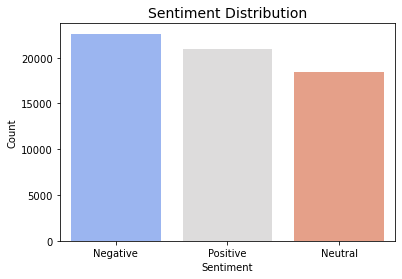

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment occurrences
sentiment_counts = df["Sentiment"].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


## Word Clouds for Sentiment

We generate word clouds for positive and negative tweets to identify commonly used words.


## Sentiment Trends by Entity

We analyze sentiment distribution across the top 10 mentioned brands or topics.


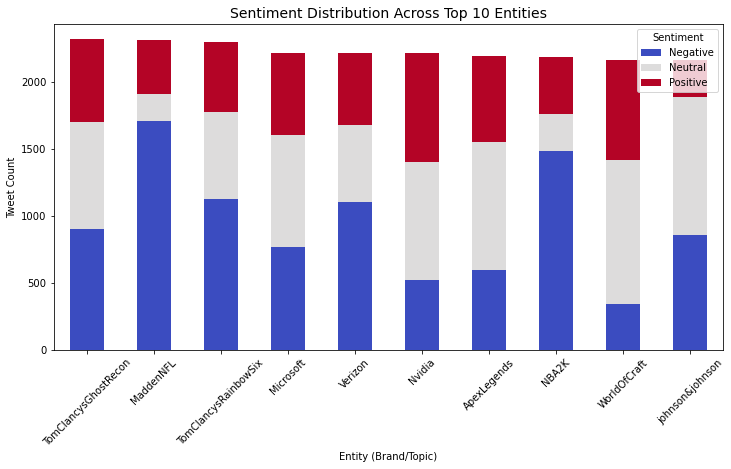

In [6]:
# Count sentiment for each entity
entity_sentiment_counts = df.groupby(["Entity", "Sentiment"]).size().unstack()

# Get top 10 mentioned entities
top_entities = df["Entity"].value_counts().index[:10]
entity_sentiment_counts = entity_sentiment_counts.loc[top_entities]

# Plot stacked bar chart
entity_sentiment_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Sentiment Distribution Across Top 10 Entities", fontsize=14)
plt.xlabel("Entity (Brand/Topic)")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()
